In [1]:
import pandas as pd


In [2]:
patient_data  = pd.read_csv("https://raw.githubusercontent.com/dphi-official/Datasets/master/patient_treat_class/training_set_label.csv" )

In [4]:
patient_data.head()

,HAEMATOCRIT,HAEMOGLOBINS,ERYTHROCYTE,LEUCOCYTE,THROMBOCYTE,MCH,MCHC,MCV,AGE,SEX,SOURCE
0,33.8,11.1,4.18,4.6,150,26.6,32.8,80.9,33,F,1
1,44.6,14.0,6.86,6.3,232,20.4,31.4,65.0,36,M,0
2,42.9,14.0,4.57,6.2,336,30.6,32.6,93.9,70,F,0
3,41.9,14.4,4.67,3.5,276,30.8,34.4,89.7,18,F,0
4,40.6,13.3,4.85,14.9,711,27.4,32.8,83.7,36,M,0


In [6]:
patient_data.shape

(3309, 11)

In [7]:
patient_data.isnull().sum()

HAEMATOCRIT     0
HAEMOGLOBINS    0
ERYTHROCYTE     0
LEUCOCYTE       0
THROMBOCYTE     0
MCH             0
MCHC            0
MCV             0
AGE             0
SEX             0
SOURCE          0
dtype: int64

In [15]:
patient_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3309 entries, 0 to 3308
Data columns (total 11 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   HAEMATOCRIT   3309 non-null   float64
 1   HAEMOGLOBINS  3309 non-null   float64
 2   ERYTHROCYTE   3309 non-null   float64
 3   LEUCOCYTE     3309 non-null   float64
 4   THROMBOCYTE   3309 non-null   int64  
 5   MCH           3309 non-null   float64
 6   MCHC          3309 non-null   float64
 7   MCV           3309 non-null   float64
 8   AGE           3309 non-null   int64  
 9   SEX           3309 non-null   uint8  
 10  SOURCE        3309 non-null   int64  
dtypes: float64(7), int64(3), uint8(1)
memory usage: 261.9 KB


In [16]:
patient_data['SOURCE'].value_counts()

0    1992
1    1317
Name: SOURCE, dtype: int64

In [8]:
patient_data['SEX'] = pd.get_dummies(patient_data['SEX'])

In [9]:
patient_data.head()

,HAEMATOCRIT,HAEMOGLOBINS,ERYTHROCYTE,LEUCOCYTE,THROMBOCYTE,MCH,MCHC,MCV,AGE,SEX,SOURCE
0,33.8,11.1,4.18,4.6,150,26.6,32.8,80.9,33,1,1
1,44.6,14.0,6.86,6.3,232,20.4,31.4,65.0,36,0,0
2,42.9,14.0,4.57,6.2,336,30.6,32.6,93.9,70,1,0
3,41.9,14.4,4.67,3.5,276,30.8,34.4,89.7,18,1,0
4,40.6,13.3,4.85,14.9,711,27.4,32.8,83.7,36,0,0


In [10]:
X = patient_data.drop('SOURCE', axis=1)

In [11]:
X.head()

,HAEMATOCRIT,HAEMOGLOBINS,ERYTHROCYTE,LEUCOCYTE,THROMBOCYTE,MCH,MCHC,MCV,AGE,SEX
0,33.8,11.1,4.18,4.6,150,26.6,32.8,80.9,33,1
1,44.6,14.0,6.86,6.3,232,20.4,31.4,65.0,36,0
2,42.9,14.0,4.57,6.2,336,30.6,32.6,93.9,70,1
3,41.9,14.4,4.67,3.5,276,30.8,34.4,89.7,18,1
4,40.6,13.3,4.85,14.9,711,27.4,32.8,83.7,36,0


In [12]:
y = patient_data['SOURCE'].values

In [14]:
y

array([1, 0, 0, ..., 0, 0, 1], dtype=int64)

In [17]:
from sklearn.model_selection import train_test_split

In [18]:
X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.3, random_state = 42)

In [19]:
from sklearn.ensemble import RandomForestClassifier

In [26]:
import numpy as np
from sklearn.model_selection import RandomizedSearchCV
# Number of features to consider at every split
max_features = ['auto', 'sqrt']
# Maximum number of levels in tree
max_depth = [int(x) for x in np.linspace(10, 110, num = 11)]
max_depth.append(None)
# Minimum number of samples required to split a node
min_samples_split = [2, 5, 10]
# Minimum number of samples required at each leaf node
min_samples_leaf = [1, 2, 4]
# Method of selecting samples for training each tree
bootstrap = [True, False]
# Create the random grid
random_grid = {'max_features': max_features,
               'max_depth': max_depth,
               'min_samples_split': min_samples_split,
               'min_samples_leaf': min_samples_leaf,
               'bootstrap': bootstrap}
print(random_grid)

{'max_features': ['auto', 'sqrt'], 'max_depth': [10, 20, 30, 40, 50, 60, 70, 80, 90, 100, 110, None], 'min_samples_split': [2, 5, 10], 'min_samples_leaf': [1, 2, 4], 'bootstrap': [True, False]}


In [27]:
rf = RandomForestClassifier()
rf_random = RandomizedSearchCV(estimator = rf, param_distributions = random_grid, n_iter = 100, cv = 3, verbose=2, random_state=42, n_jobs = -1)
rf_random.fit(X_train,y_train)

Fitting 3 folds for each of 100 candidates, totalling 300 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 6 concurrent workers.
[Parallel(n_jobs=-1)]: Done  29 tasks      | elapsed:    4.9s
[Parallel(n_jobs=-1)]: Done 150 tasks      | elapsed:   13.3s
[Parallel(n_jobs=-1)]: Done 300 out of 300 | elapsed:   21.8s finished


RandomizedSearchCV(cv=3, estimator=RandomForestClassifier(), n_iter=100,
                   n_jobs=-1,
                   param_distributions={'bootstrap': [True, False],
                                        'max_depth': [10, 20, 30, 40, 50, 60,
                                                      70, 80, 90, 100, 110,
                                                      None],
                                        'max_features': ['auto', 'sqrt'],
                                        'min_samples_leaf': [1, 2, 4],
                                        'min_samples_split': [2, 5, 10]},
                   random_state=42, verbose=2)

In [28]:
rf_random.best_estimator_

RandomForestClassifier(max_depth=30, max_features='sqrt', min_samples_split=5)

In [58]:
from sklearn.metrics import roc_curve
from sklearn.metrics import roc_auc_score

In [59]:
rf = RandomForestClassifier(max_depth=30, max_features='sqrt', min_samples_split=5)
rf.fit(X_train,y_train)

RandomForestClassifier(max_depth=30, max_features='sqrt', min_samples_split=5)

In [61]:
pred = rf.predict_proba(X_val)

In [63]:
ls = pred[ : , 1]

In [64]:
ls_auc = roc_auc_score(y_val,ls)

In [65]:
ls_auc

0.7951408015050464

In [66]:
fpr,tpr,_ = roc_curve(y_val,ls)

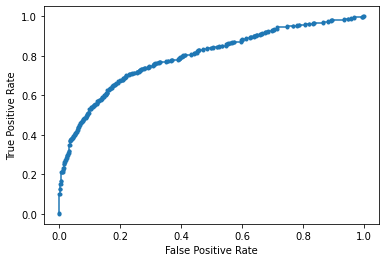

In [67]:
import matplotlib.pyplot as plt
%matplotlib inline
plt.plot(fpr, tpr, marker='.')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
# show the plot
plt.show()

In [53]:
preds = rf_random.best_estimator_.predict(X_val)

In [34]:
from sklearn.metrics import accuracy_score,confusion_matrix

In [35]:
score = accuracy_score(preds,y_val)

In [36]:
score

0.75730110775428

In [37]:
cm = confusion_matrix(preds,y_val)

In [38]:
cm

array([[520, 162],
       [ 79, 232]], dtype=int64)

In [39]:
test_data = pd.read_csv('https://raw.githubusercontent.com/dphi-official/Datasets/master/patient_treat_class/testing_set_label.csv')

In [40]:
test_data.head()

,HAEMATOCRIT,HAEMOGLOBINS,ERYTHROCYTE,LEUCOCYTE,THROMBOCYTE,MCH,MCHC,MCV,AGE,SEX
0,41.2,14.3,3.99,4.1,296,35.8,34.7,103.3,24,M
1,25.4,9.1,3.17,19.3,304,28.7,35.8,80.1,66,M
2,47.5,15.2,6.23,11.5,385,24.4,32.0,76.2,17,F
3,43.0,14.5,5.35,4.8,134,27.1,33.7,80.4,14,M
4,40.7,13.6,4.77,4.3,199,28.5,33.4,85.3,24,M


In [41]:
test_data['SEX'] =  pd.get_dummies(test_data['SEX'])

In [42]:
test_data.head()

,HAEMATOCRIT,HAEMOGLOBINS,ERYTHROCYTE,LEUCOCYTE,THROMBOCYTE,MCH,MCHC,MCV,AGE,SEX
0,41.2,14.3,3.99,4.1,296,35.8,34.7,103.3,24,0
1,25.4,9.1,3.17,19.3,304,28.7,35.8,80.1,66,0
2,47.5,15.2,6.23,11.5,385,24.4,32.0,76.2,17,1
3,43.0,14.5,5.35,4.8,134,27.1,33.7,80.4,14,0
4,40.7,13.6,4.77,4.3,199,28.5,33.4,85.3,24,0


In [43]:
test_preds = rf_random.best_estimator_.predict(test_data)

In [44]:
test_preds

array([0, 1, 0, ..., 1, 1, 1], dtype=int64)

In [50]:
result = pd.DataFrame(test_preds)
result.index = test_data.index
result.columns = ['predictions']

In [51]:
result.head()

,predictions
0,0
1,1
2,0
3,1
4,0


In [52]:
result.to_csv('submission.csv')